<h2>PRINCIPAL COMPONENT ANALYSIS</h2>
<h3>Facilitator: Kevin Mugo Mwaniki</h3>

In [71]:
#Used in the handling of DataFrames
import pandas as pd
#Used in the handling of arrays
import numpy as np
#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("../data/Households_by_Number_of_Dwelling_Units_and_County_2009.csv")

<p>The code below is used to sample the first five coluns in the dataset</p>

In [5]:
df.head()

,County,Location,Dwelling_Units_,Households,Habitable_Rooms_,Male_Population,Female_Population,Total_Population,Persons_per_room,County_Centroid,OBJECTID
0,NAIROBI,Overall,1229183,985016,1741017,1584836,1525025,3109861,1.8,"(-1.2926489320000001, 36.864854780000002)",0
1,NYANDARUA,Overall,285036,143879,501260,291574,303847,595421,1.2,"(-0.32014949999999998, 36.480091790000003)",1
2,NYANDARUA,Rural,234446,113470,413130,235473,245341,480814,1.2,"(-0.32014949999999998, 36.480091790000003)",2
3,NYANDARUA,Urban,50590,30409,88130,56101,58506,114607,1.3,"(-0.32014949999999998, 36.480091790000003)",3
4,NYERI,Overall,383817,201703,703951,336556,352881,689437,1.0,"(-0.34295653199999998, 36.953878789999997)",4


<p>The code below is used to get the number of rows and columns in the dataset</p>

In [6]:
df.shape

(72, 11)

<h2>Daat types in the dataset</h2>
<p>The cell below is used to briefly analyze the data types in the dataset of the project</p>

In [17]:
df.dtypes

County                object
Location              object
Dwelling_Units_        int64
Households             int64
Habitable_Rooms_       int64
Male_Population        int64
Female_Population      int64
Total_Population       int64
Persons_per_room     float64
County_Centroid       object
OBJECTID               int64
dtype: object

<p>The data types can be summarized as follows statistically:</p>

In [25]:
cols = ['counts']
dftypes = pd.DataFrame(df.dtypes.value_counts())
dftypes.columns = cols
dftypes

,counts
int64,7
object,3
float64,1


<h2>Missing values</h2>
<p>Missing values are usually identified by the name <b>NaN</b>. From the cell below, the data has no missing values</p>

In [11]:
df.isnull().sum()

County               0
Location             0
Dwelling_Units_      0
Households           0
Habitable_Rooms_     0
Male_Population      0
Female_Population    0
Total_Population     0
Persons_per_room     0
County_Centroid      0
OBJECTID             0
dtype: int64

<h2>Handling of Missing Values</h2>
<p>If there are missing values, they can be replaced using the following methodologies:</p>
<ol>
    <li>Forward filling</li>
    <li>Backward filling</li>
    <li>Mean</li>
    <li>Median</li>
</ol>


In [ ]:
#df.fillna(df.mean(), inplace = True)

<h2>Encoding of the data</h2>
<p>Standard scaling does not support data that has other formats like strings. To solve this, the data is duplicated using the <b>df.copy()</b> function. From there, these strings are replaced with numbers during the encoding process. The integers are then scaled to the required metrics.</p>

In [37]:
df2 = df.copy()
df2.head()

,County,Location,Dwelling_Units_,Households,Habitable_Rooms_,Male_Population,Female_Population,Total_Population,Persons_per_room,County_Centroid,OBJECTID
0,NAIROBI,Overall,1229183,985016,1741017,1584836,1525025,3109861,1.8,"(-1.2926489320000001, 36.864854780000002)",0
1,NYANDARUA,Overall,285036,143879,501260,291574,303847,595421,1.2,"(-0.32014949999999998, 36.480091790000003)",1
2,NYANDARUA,Rural,234446,113470,413130,235473,245341,480814,1.2,"(-0.32014949999999998, 36.480091790000003)",2
3,NYANDARUA,Urban,50590,30409,88130,56101,58506,114607,1.3,"(-0.32014949999999998, 36.480091790000003)",3
4,NYERI,Overall,383817,201703,703951,336556,352881,689437,1.0,"(-0.34295653199999998, 36.953878789999997)",4


<p>In order to carry out the encoding process, the <b>LabelEncoder</b> library is imported from <b>sklearn.preprocessing</b>. The function to the library is then stored in the variable <b>le</b> for ease of manipulation. After the encoding process, the data will be in the format outputed in the next cell below</p>

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2.loc[:, 'County'] = le.fit_transform(df2.County.values)
df2.loc[:, 'Location'] = le.fit_transform(df2.Location.values)
df2.loc[:, 'County_Centroid'] = le.fit_transform(df2.County_Centroid.values)
df2.head()

,County,Location,Dwelling_Units_,Households,Habitable_Rooms_,Male_Population,Female_Population,Total_Population,Persons_per_room,County_Centroid,OBJECTID
0,18,1,1229183,985016,1741017,1584836,1525025,3109861,1.8,12,0
1,19,1,285036,143879,501260,291574,303847,595421,1.2,3,1
2,19,2,234446,113470,413130,235473,245341,480814,1.2,3,2
3,19,3,50590,30409,88130,56101,58506,114607,1.3,3,3
4,20,1,383817,201703,703951,336556,352881,689437,1.0,4,4


<h2>Scaling of the data</h2>
<p>During this stage, data points are brought close to each other in order to reduce the number of dimensions of the data. This will make the data points to have an almost similar influence to the output that is to be obtained. To carry out the standard scaling process, the <b>StandardScaler</b> library is imported from <b>sklearn.preprocessing</b></p>

In [ ]:
#Standard scaling library
from sklearn.preprocessing import StandardScaler

<p>The StandardScaler library is then fit to the duplicated data, <b>df2</b> as shown below:</p>

In [45]:
ss = StandardScaler()
ss.fit(df2)

StandardScaler()

<p>The values are then scaled to a uniform value for uniformity throughout the whole process:</p>

In [74]:
scaled_df2 = ss.transform(df2)

<h2>Principal Component Analysis</h2>
<p>The library that assists in the Principal Component Analysis process is imported as <b>PCA</b></p>

In [53]:
from sklearn.decomposition import PCA

<p>The cell below is used to reduce the dimensions of the data from 11 to 2:</p>

In [54]:
pca = PCA(n_components=2)

In [55]:
pca.fit(scaled_df2)

PCA(n_components=2)

<p>The data whose dimensionality is reduced is then stored in the <b>trans_pca</b> array as shown in the cell below:</p>

In [78]:
trans_pca = pca.transform(scaled_data)

<p>The cell below is used to confirm that the number of rows is still the same but the dimensionality (number of columns) have been changed</p>

In [62]:
trans_pca.shape

(72, 2)

In [63]:
df.shape

(72, 11)

<h2>Visualization of the data reduced in dimension</h2>

Text(0, 0.5, 'Second Principal Component')

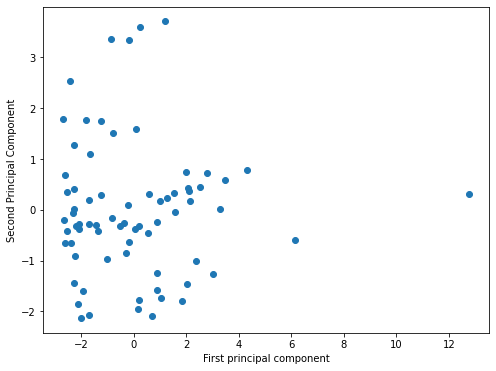

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(trans_pca[:,0],trans_pca[:,1],c=trans_pca[''],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')